# TEST Fast5Tools package

## Imports

In [3]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
from itertools import islice
from pprint import pprint as pp
import pysam
import sys
from tqdm import tqdm
from collections import OrderedDict, defaultdict, Counter, namedtuple

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 1000

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Fast5Wrapper import Fast5Wrapper
from Fast5Tools.Helper_fun import stderr_print, recursive_file_gen, visit_h5
from Fast5Tools.Basecall import Basecall
from Fast5Tools.Alignment import Alignment
from Fast5Tools.Eventalign import Eventalign
from Fast5Tools.Fast5Parse import Fast5Parse

# Test Fast5

## Fast5 init

In [4]:
help (Fast5.__init__, full=True)

In [7]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print (f)

[Fast5]	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459
	[Raw]  Signal: [-0.68773109 -1.05224675 -0.95504257 -0.97934362 -1.01174501]... / Length: 87570 / Normalization: zscore



In [4]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
print (f)

[Fast5]	Read ID: 61e799eb-5571-4cc4-bbf6-b3929b197459
	[Raw]  Signal: [623 578 590 587 583]... / Length: 87570



In [16]:
f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/1/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_237_strand.fast5", basecall_required=True)
print (f)

[Fast5]	Read ID: 2c32553e-62c6-4c7a-bf05-249771364f04
	[Raw]  Signal: [-1.19716657 -1.18884066 -1.21381839 -1.08060387 -0.95571525]... / Length: 56107 / Normalization: zscore
	[Basecall]  Seq: AUAUCGAAUA...CCUAAUCCAG / Length: 1147 / Empty kmers: 195 / Mean quality: 10.96



In [21]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", basecall_required=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [24]:
f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
print(f.read_id)
print(f.sequencing_kit)
print(f.flowcell_type)

61e799eb-5571-4cc4-bbf6-b3929b197459
SQK-RNA001
FLO-MIN106


## Test Metadata

In [25]:
f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'antons_mac_pro_internal_sanger_ac_uk_20180625_fah77625_mn23126_sequencing_run_s1_57529'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),


In [8]:
pp (f.raw.metadata)

OrderedDict([('read_number', 10),
             ('read_id', '61e799eb-5571-4cc4-bbf6-b3929b197459'),
             ('start_mux', 1),
             ('start_time', 79983),
             ('duration', 87570),
             ('median_before', 254.354736328125),
             ('normalization', 'zscore')])


In [9]:
pp (f.basecall.metadata)

OrderedDict([('segmentation', 'Analyses/Segmentation_000'),
             ('time_stamp', '2018-Jul-03 18:44:47'),
             ('name', 'ONT Albacore Sequencing Software'),
             ('version', '2.3.1'),
             ('component', 'basecall_1d')])


## Test Data access

In [30]:
f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization="zscore")
display(f.basecall.kmers[:10])
display(f.raw.signal[:10])

array([(b'GGACT',    0,   15, -1.04522644, -1.06034709, 0.11497042),
       (b'GACTT',   15,   60,         nan,         nan,        nan),
       (b'ACTTC',   15,   60, -1.11434941, -1.07654779, 0.14640506),
       (b'CTTCC',   60,  105, -1.34637938, -1.28715683, 0.16223021),
       (b'TTCCC',  105,  120, -1.69271425, -1.66787318, 0.08766691),
       (b'TCCCT',  120,  240, -1.49844091, -1.69217422, 0.66387411),
       (b'CCCTA',  240, 3720,         nan,         nan,        nan),
       (b'CCTAA',  240, 3720,  0.95412096,  0.98904091, 0.2853537 ),
       (b'CTAAT', 3720, 4080,         nan,         nan,        nan),
       (b'TAATA', 3720, 4080, -0.31572262, -0.35561683, 0.31462231)],
      dtype=[('seq', 'S5'), ('start', '<u4'), ('end', '<u4'), ('mean', '<f8'), ('median', '<f8'), ('std', '<f8')])

array([-0.68773109, -1.05224675, -0.95504257, -0.97934362, -1.01174501,
       -1.10084883, -1.10084883, -1.06034709, -1.07654779, -1.07654779])

## Test plot_raw

In [31]:
help (Fast5.plot_raw, full=True)

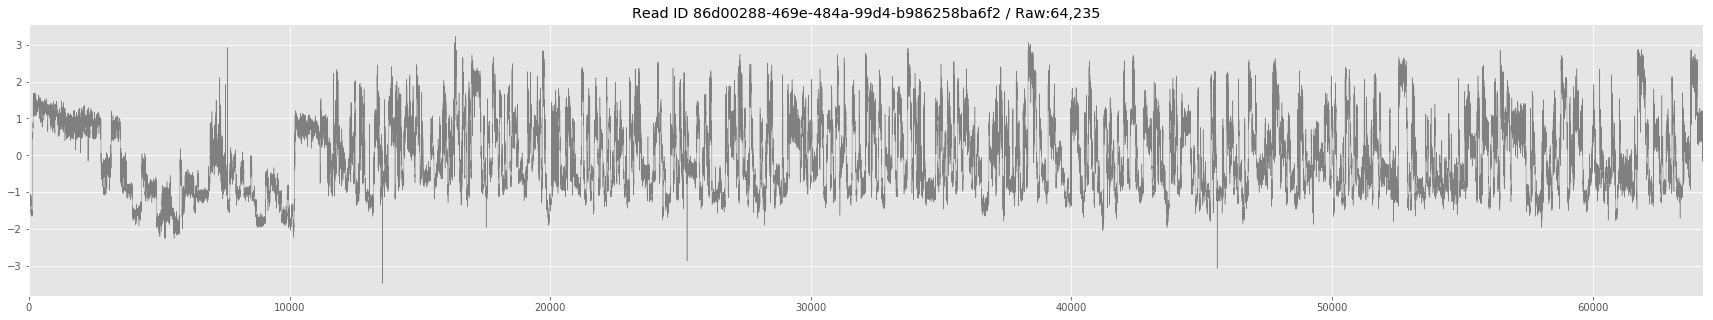

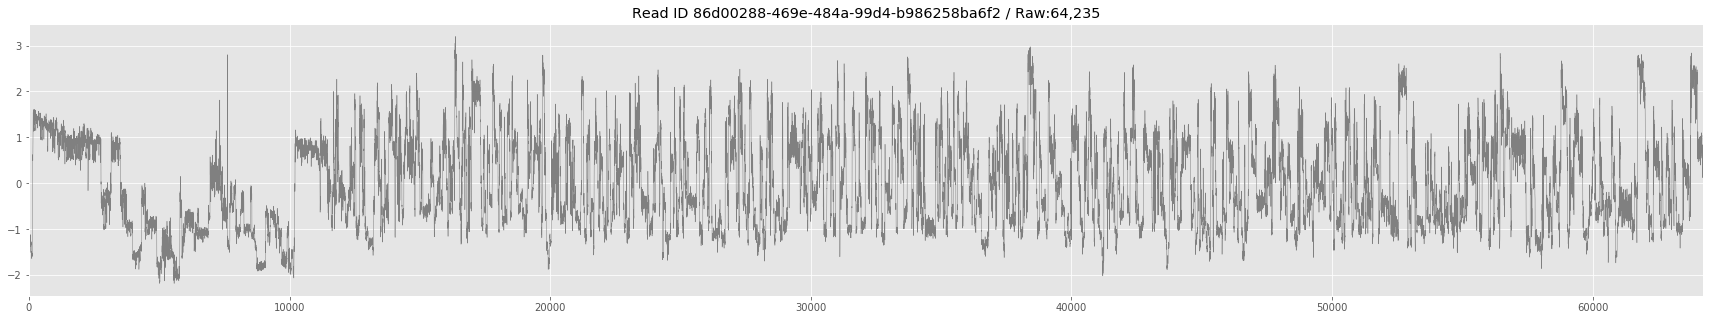

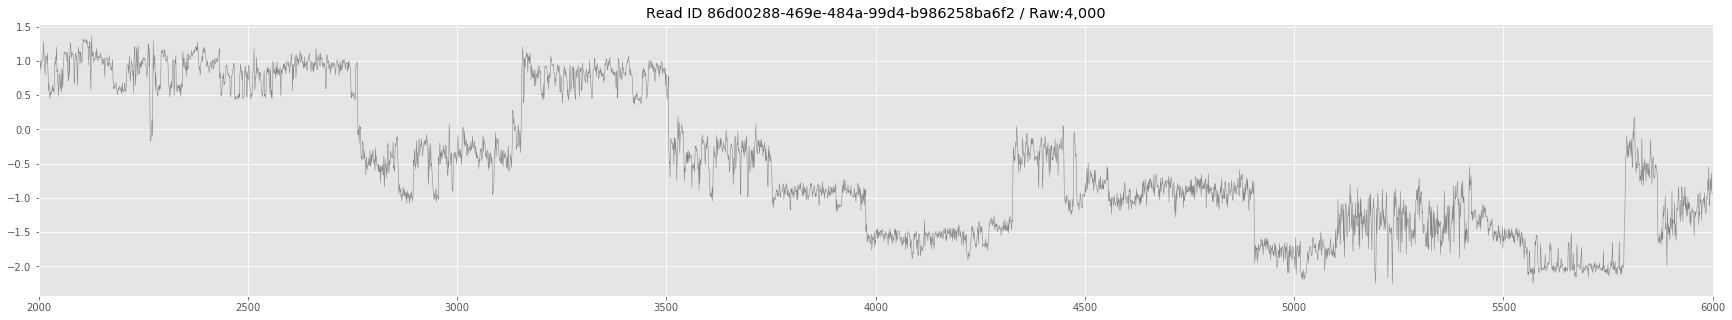

In [5]:
f = Fast5.from_fast5 (fast5_fn="./data/raw/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_120_strand.fast5")
fig, ax = f.plot()
fig, ax = f.plot (smoothing_win_size=3)
fig, ax = f.plot (start = 2000, end = 6000)

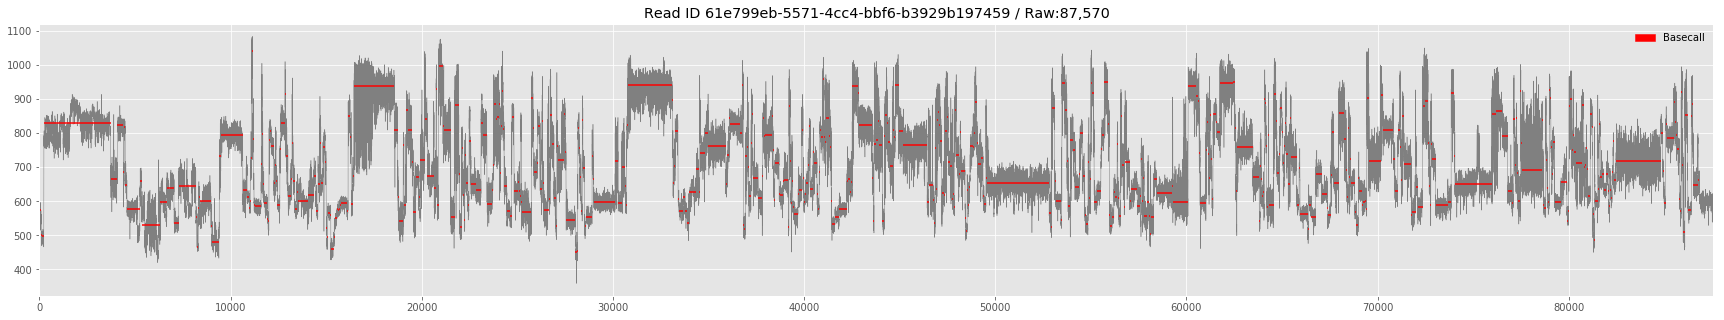

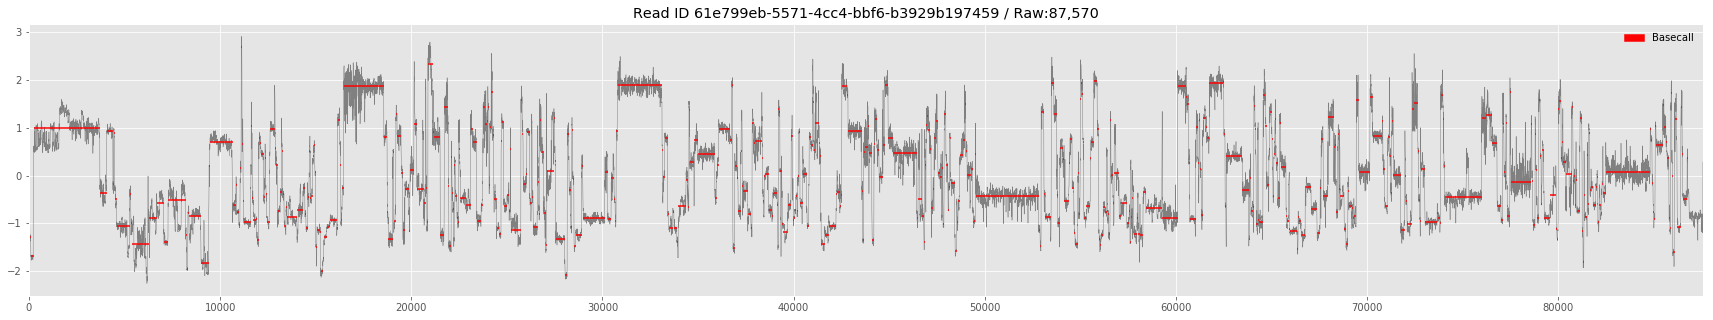

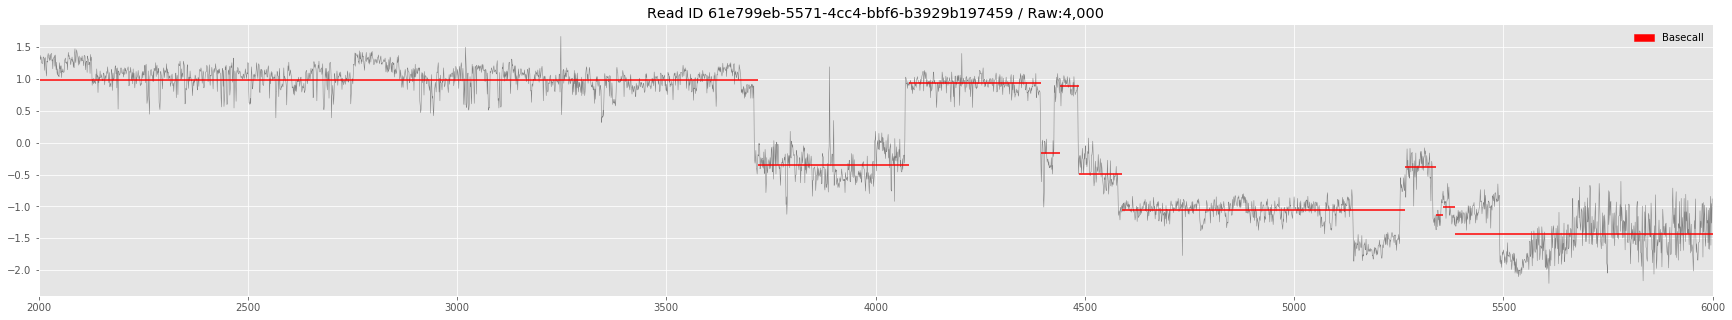

In [7]:
f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5", signal_normalization=None)
fig, ax = f.plot()

f = Fast5.from_fast5 (fast5_fn="./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_103_strand.fast5")
fig, ax = f.plot (smoothing_win_size=10)
fig, ax = f.plot (start = 2000, end = 6000)

# Fast5_parse

In [10]:
Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./output/read.db", threads=4, verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:22 Invalid File:0


In [13]:
visit_h5 ("./output/read.db", "fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482")

basecall <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/basecall" (3 members)>
basecall/kmers <HDF5 dataset "kmers": shape (446,), type "|V37">
basecall/qual <HDF5 dataset "qual": shape (450,), type "<u4">
basecall/seq <HDF5 dataset "seq": shape (), type "|O">
metadata <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/metadata" (3 members)>
metadata/channel_id <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/metadata/channel_id" (0 members)>
metadata/context_tags <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/metadata/context_tags" (0 members)>
metadata/tracking_id <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/metadata/tracking_id" (0 members)>
raw <HDF5 group "/fast5/08642be5-5cf7-4c4c-8c45-e4d569b9a482/raw" (1 members)>
raw/signal <HDF5 dataset "signal": shape (21583,), type "<f8">


In [3]:
Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=6, verbose=True)

Initialise
Parse Fast5 files and save to database
	Valid files:12,492 Invalid File:0


# Fast5Wrapper

### init with context manager

In [11]:
with Fast5Wrapper (db_file="./output/read.db", verbose=True) as f:
    display(f.read_id_list)

Load reads ids
Open hdf5 database


array([b'e6a8e4d0-7b3c-471a-be26-fa7857d12663',
       b'3f09025f-3d2c-4f84-9ea6-63dba736b649',
       b'1f83ee80-ac29-46be-b8bc-9dc9325f1fa7',
       b'f8325de9-a77e-4616-a4a8-69ecf32e1688',
       b'2c32553e-62c6-4c7a-bf05-249771364f04',
       b'37dfa1d5-5d84-486c-bf47-9eb6438f5645',
       b'3784283c-47cc-48ac-8d7b-7efd32123b56',
       b'4e21bf07-e2df-42d8-b347-59ef2c0618ea',
       b'3e81c32a-f2ee-4719-a88d-e0affe93d26f',
       b'9a1c5296-2ab1-4abd-8d50-e059754cf332',
       b'5b7fadd0-c646-4c7b-9800-66ee658a5ca8',
       b'6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0',
       b'97205d42-93ac-4c99-af78-e553f7d1ff83',
       b'08642be5-5cf7-4c4c-8c45-e4d569b9a482',
       b'6af04302-04c8-4d8d-8e87-aa69178b3f24',
       b'151757ea-53de-44b1-b86e-f823511af02a',
       b'68804104-71dc-465c-b82d-3a99a4689701',
       b'0ef36fa0-7c3f-47f5-8410-027f50724701',
       b'bcb20156-a5fe-4daa-aad9-b62c286e468d',
       b'61e799eb-5571-4cc4-bbf6-b3929b197459',
       b'c38cbad9-d91e-4208-9317-832f4e2

Close hdf5 database


In [8]:
with Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    display(f.read_id_list)

Load reads ids
Open hdf5 database


array([b'd62cc798-c904-43a7-b4ee-97220dd5ecd2',
       b'064de274-0ed8-40d4-8a99-0aa80e564d71',
       b'c55db0c2-98b9-41b8-91f6-07f1a708212e', ...,
       b'cf06c2bf-6776-4427-9221-cd9f0dc11b46',
       b'e7d0e9df-d4e4-4c9c-98ac-06d971c01f33',
       b'a7bef6d7-b1d2-403b-851b-9954fe822009'], dtype='|S40')

Close hdf5 database


### get_fast5

In [22]:
with Fast5Wrapper (db_file="./output/read.db", verbose=True) as f:
    print (f.get_fast5 ("5b7fadd0-c646-4c7b-9800-66ee658a5ca8"))

Load reads ids
Open hdf5 database
Close hdf5 database


[Fast5]	Read ID: 5b7fadd0-c646-4c7b-9800-66ee658a5ca8
	[Raw]  Signal: [-1.25072639 -1.33272503 -1.28352584 -1.39012407 -1.42292353]... / Length: 24233 / Normalization: zscore
	[Basecall]  Seq: CUGAUGCUUU...AAUCCCUCAG / Length: 464 / Empty kmers: 95 / Mean quality: 9.69



In [21]:
with Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    print (f.get_fast5("d62cc798-c904-43a7-b4ee-97220dd5ecd2"))

Load reads ids
Open hdf5 database
Close hdf5 database


[Fast5]	Read ID: d62cc798-c904-43a7-b4ee-97220dd5ecd2
	[Raw]  Signal: [ 2.90960067 -0.54647022 -0.70987783 -0.76707049 -0.79975202]... / Length: 37608 / Normalization: zscore
	[Basecall]  Seq: CACUUGAUGA...AAUUCCUCUA / Length: 518 / Empty kmers: 97 / Mean quality: 10.89



### sample_fast5

In [5]:
with Fast5Wrapper (db_file="./output/read.db", verbose=True) as f:
    print (f.sample_fast5 (3))

Load reads ids
Open hdf5 database
Close hdf5 database


[[Fast5]	Read ID: 68804104-71dc-465c-b82d-3a99a4689701
	[Raw]  Signal: [ 0.82866855 -1.05671434 -1.05671434 -0.97402211 -1.03190667]... / Length: 57697 / Normalization: zscore
	[Basecall]  Seq: UGGGCCUUCC...AUCCACCAGG / Length: 1006 / Empty kmers: 162 / Mean quality: 10.63
, [Fast5]	Read ID: 6af04302-04c8-4d8d-8e87-aa69178b3f24
	[Raw]  Signal: [-0.03584251 -1.22935517 -1.15235435 -1.19085476 -1.12155403]... / Length: 27409 / Normalization: zscore
	[Basecall]  Seq: CCAAUACAGA...AAAAUCCAGG / Length: 828 / Empty kmers: 148 / Mean quality: 10.58
, [Fast5]	Read ID: 0ef36fa0-7c3f-47f5-8410-027f50724701
	[Raw]  Signal: [-1.07415132 -1.31759626 -1.25673503 -1.11979725 -1.06654366]... / Length: 42730 / Normalization: zscore
	[Basecall]  Seq: CACUUGAACG...CCUCAAUUUG / Length: 911 / Empty kmers: 142 / Mean quality: 12.19
]


In [71]:
with Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    print (f.sample_fast5 (3))

Load reads ids
Open hdf5 database
Close hdf5 database


[[Fast5]	Read ID: 09a53c5b-0a7a-4548-a904-90ef884fffd5
	[Raw]  Signal: [-1.2648511  -1.28967364 -1.24002856 -1.41378634 -1.36414126]... / Length: 26402 / Normalization: zscore
	[Basecall]  Seq: UCGGUGUCGA...CUAAUCCCAU / Length: 532 / Empty kmers: 105 / Mean quality: 9.01
, [Fast5]	Read ID: d2a25e96-89aa-4344-9cc9-13da1de755fc
	[Raw]  Signal: [-4.09565596 -4.14449647 -4.2072914  -4.21426862 -4.22124583]... / Length: 10683 / Normalization: zscore
	[Basecall]  Seq: GAAUACACCA...AGCUGCCCCG / Length: 310 / Empty kmers: 54 / Mean quality: 11.47
, [Fast5]	Read ID: 4ad42f06-bf1d-4a7a-8c24-9a3370504029
	[Raw]  Signal: [-0.47641364 -0.60209583 -0.97914241 -0.86183903 -1.03779409]... / Length: 30823 / Normalization: zscore
	[Basecall]  Seq: CACUUAUUUU...CCAAUCCAUA / Length: 617 / Empty kmers: 114 / Mean quality: 11.14
]


### iter_fast5

In [73]:
l = []
with Fast5Wrapper (db_file="./output/read.db", verbose=True) as f:
    for fast5 in f.iter_fast5():
        l.append(fast5)

Load reads ids
Open hdf5 database
Close hdf5 database


In [74]:
l = []
with Fast5Wrapper (db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", verbose=True) as f:
    for fast5 in f.iter_fast5():
        l.append(fast5)

Load reads ids
Open hdf5 database
Close hdf5 database


# Alignment parsing

In [5]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/pass/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", max_sync_buffer=5, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/genome_aligned_reads.bam", analysis_name="Genome_Alignment", max_sync_buffer=5, verbose=True)

Initialise
Parse Fast5 files and save to database
Write database index                                                                                
	Valid files:22 Invalid File:0
Load database index
	Read in database:22
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid reads:20	Reads not in database:0	Reads unmapped:2	Secondary hits:1
Parse alignment file ./data/align/genome_aligned_reads.bam
	Valid reads:22	Reads not in database:0	Reads unmapped:0	Secondary hits:1


In [6]:
f.sample()

[[Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_38_strand.fast5
 	Read ID:68804104-71dc-465c-b82d-3a99a4689701	Raw signals points:57697	Zscore normalised mean:674.7888278420022
 	Albacore_basecalling
 		Seq: UGGGCCUUCC...AUCCACCAGG / Length: 1006 / Empty kmers: 162 / Mean quality: 10.63
 	Transcriptome_Alignment
 		Query:68804104-71dc-465c-b82d-3a99a4689701-2:881 (1010 pb) / Reference:YIL117C-27:957(+) (930 pb) / Alignment len:879 / Mapq:60 / Align Score:1056
 	Genome_Alignment
 		Query:68804104-71dc-465c-b82d-3a99a4689701-47:1008 (1010 pb) / Reference:IX-140504:141542(-) (1038 pb) / Alignment len:961 / Mapq:60 / Align Score:1090,
 [Fast5] file:./data/basecall/workspace/pass/0/20180625_FAH77625_MN23126_sequencing_run_S1_57529_read_10_ch_224_strand.fast5
 	Read ID:ed05c5e6-7aab-4970-a431-3411047764a6	Raw signals points:41612	Zscore normalised mean:699.4311736998943
 	Albacore_basecalling
 		Seq: GAAUUCAAGG...CUCCCUCCAG / Length

In [12]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/0/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read_small.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam", analysis_name="Genome_Alignment", verbose=True)

Initialise
Parse Fast5 files and save to database
Write database indexnvalid File:0
	Valid files:2,000 Invalid File:0
Load database indexParse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads.bam
	Valid reads:1,879	Reads not in database:9,819	Reads unmapped:794	Secondary hits:2,222
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/genome_aligned_reads.bam
	Valid reads:1,982	Reads not in database:10,366	Reads unmapped:144	Secondary hits:1,544


# NanopolishParser

In [34]:
f = Fast5Parse (fast5_dir="./data/basecall/workspace/", db_file="./data/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="./data/align/cDNA_aligned_reads.bam", analysis_name="Transcriptome_Alignment", include_secondary=True)
f.add_nanopolish_eventalign (eventalign_fn="./data/nanopolish/nanopolish_read_index_no_sec.tsv")

Initialise
Parse Fast5 files and save to database
Write database indexlid File:0
	Valid files:40 Invalid File:0
Parse alignment file ./data/align/cDNA_aligned_reads.bam
	Valid reads:20	Valid hits:21	Reads not in database:0	Skiped unmapped and secondary:2
Parse Nanopolish eventalign file ./data/nanopolish/nanopolish_read_index_no_sec.tsv
	Valid reads:19	Valid kmers:27,433	Empty_kmers:0	Reads not in database:0


,seq,start,end,mean,median,std
0,GTATC,1843,2038,-0.654044,-0.746684,0.398535
1,ATCCC,2038,2053,NaN,NaN,NaN
2,ATCCC,2038,2053,-1.364022,-1.370769,0.057216
3,TCCCT,2053,2083,-1.483216,-1.526790,0.127220
4,CCCTT,2083,2128,-1.285496,-1.294866,0.099902


ACAATTTTCAAAAATGCTTTTTGTCGCCTTTAACGCCGCTGTCGCCGCTGTCGCTTTGCCGCTGGTTAACAATTTTGCCAATTAAAATTTTCAGCCAACTTGGAAGGACGGCTTTTCCGAAAATGTTTTCCCCAGCTTGGTTTCCACCGCTACCCTTCCCCTGGCGAAGTTATCAATAAACCAACATTGGTGCCCTGTTCTTAAACCCCAAAGAACGGTACTTTTACTGCTGGTCCCGGTTTCCTTACTGGAGCTTAAAAACACCTCTGCCGGCTTTATTACTCTGGTTCCTCCTCTGGTGCTGCTGCTAAGGCTTTTTTCAATTCAACTTCTGGTGCCTTGTTTGCTGGTGGCGCCGCCTTTTGTTGTTTATTTTTGGTTTAATATTATTTTTTTACCCTAAATTTTTTTTTTTATAAACTTCTTGGCATTTAACAAATAAATAATTGGATTTAGGAAAAATTTTTAATTTTTAAATTATTCCCCTTCCCCTTTCTTAATCCCCCCCAACAAAAAAAATCCAAAACAAACTGGCCAACTACCCTTCCCCATG


,seq,start,end,ref_pos,mean,median,std
0,TGTTG,9815,9871,394,0.320767,-0.025613,0.770836
1,TTGTT,9871,9998,393,0.402076,0.493053,0.450162
2,GTTGT,9998,10026,392,-0.284343,-0.303921,0.178506
3,TGTTG,10026,10184,391,0.596818,0.526787,0.595275
4,TTGTT,10184,10208,390,0.823719,0.859913,0.174492


GCTCGCTTCTATCGCCGCTGTCGCCGCTGTCGCTTCTGCCGCTGCTAACGTTACCACTGCTACTGTCAGCCAAGACTACCACTTTGGTCACCATCACTTCTTGTGACCACGTCTGTTCAAACTCCCCAGCTTGGTTTCCACCGCTACCGTCACCGTCGATGACGTTATCACTCAATACACCACCTGGTGCCCATTGACCACTGAAGCCCAAAGAACGGTACTTCTACTGCTGCTCCAGTTACCTCTACTGAAGCTCCAAAGAACACCACCTCTGCTGCCAACTCACTCTCACCTCTTACACTGGTGCTGCTGCTAAGGCTTTGCCAGCTGCTGGTGCTTTGTTGGCTGGTGCCGCTGCTTTGTTGTGT


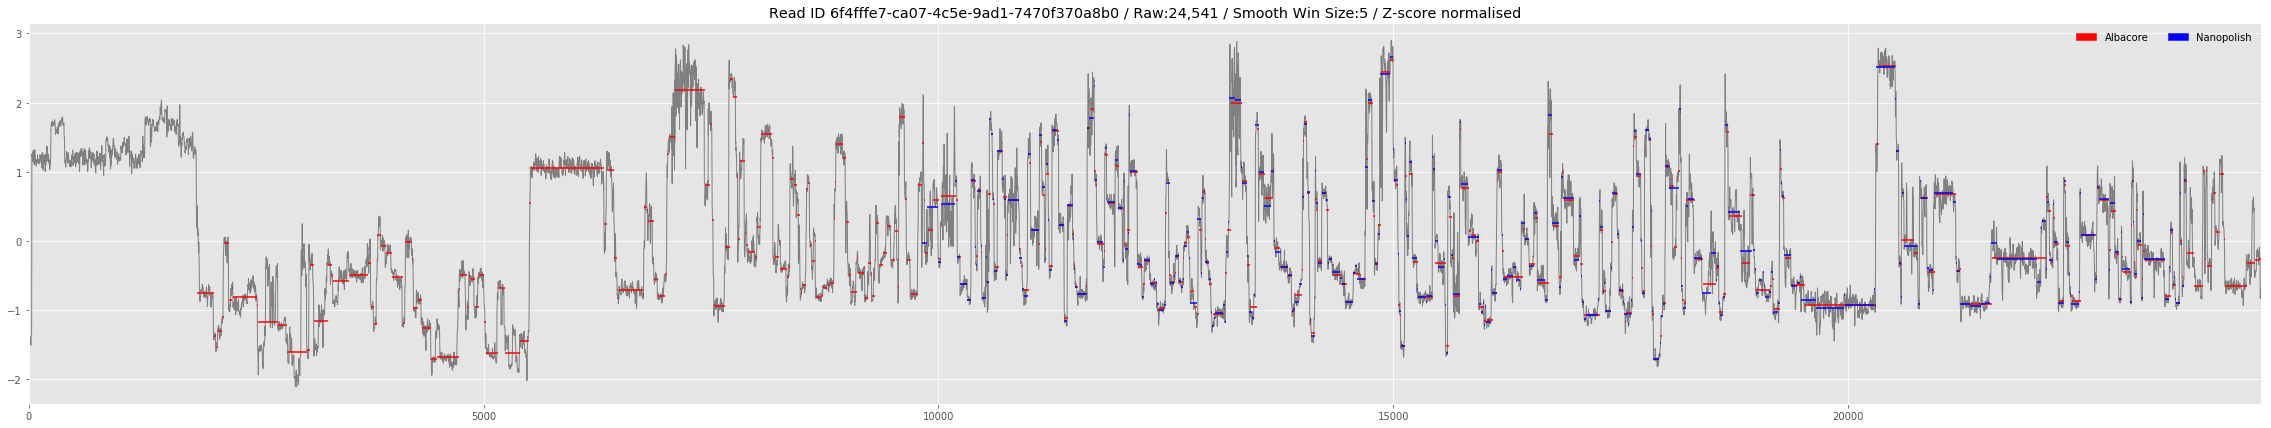

In [36]:
read_name = "6f4fffe7-ca07-4c5e-9ad1-7470f370a8b0"
jprint ("Albacore", bold=True, size=110)
display (f[read_name].analyses['Albacore_basecalling'].kmers_df.head())
print (f[read_name].analyses['Albacore_basecalling'].kmer_seq)

jprint ("Nanopolish", bold=True, size=110)
display (f[read_name].analyses['Nanopolish_eventalign'].kmers_df.head())
print (f[read_name].analyses['Nanopolish_eventalign'].kmer_seq)

fig, ax = f[read_name].plot(figsize=(40,7), smoothing_win_size=5, raw_linewidth=1)

In [7]:
f = Fast5Parse (fast5_dir="/home/aleg/Analyses/Nanopore_yeast/basecall/workspace/pass/", db_file="/home/aleg/Analyses/Nanopore_yeast/Fast5Tools/read.db", threads=8, verbose=True)
f.add_bam_alignment (alignment_fn="/home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam", analysis_name="Transcriptome_Alignment", include_secondary=False)
f.add_nanopolish_eventalign (eventalign_fn="/home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv")

Initialise
Parse Fast5 files and save to database
	Valid files:12,492 Invalid File:0
Parse alignment file /home/aleg/Analyses/Nanopore_yeast/minimap/cDNA_aligned_reads_no_sec.bam
	Valid reads:11,698	Valid hits:11,698	Reads not in database:0	Skiped unmapped and secondary:0
Parse Nanopolish eventalign file /home/aleg/Analyses/Nanopore_yeast/nanopolish/nanopolish_read_index_no_sec.tsv
	Valid reads:11,522	Valid kmers:14,075,941	Empty_kmers:43,038	Reads not in database:0


# DEV

In [8]:
visit_h5 ()